In [2]:
import wave, struct, random, math, heapq
import pyaudio
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.fftpack import fft,fftfreq
%matplotlib inline

# Synthesizing

In [3]:
#General
FREQUENCY1 = 1000
FREQUENCY2 = 2000
N_CHANNELS = 1
SAMPLING_RATE = 48000 #Hz
SAMPLE_WIDTH = 2 #bytes
AMPLITUDE = 2000 #0-32767

#file specific
FILE = "./../sound.wav"
N_SAMPLES = SAMPLING_RATE
STRING = "hello"

In [4]:
wav_file=wave.open(FILE, 'w')
wav_file.setnchannels(N_CHANNELS)
wav_file.setsampwidth(SAMPLE_WIDTH)
wav_file.setframerate(SAMPLING_RATE)
wav_file.setnframes(N_SAMPLES)

sine_wave = [np.sin(2 * np.pi * FREQUENCY1 * x/SAMPLING_RATE) for x in range(0,N_SAMPLES//2)]
sine_wave2 = [np.sin(2 * np.pi * FREQUENCY1/4 * x/SAMPLING_RATE) for x in range(N_SAMPLES//2,N_SAMPLES)]

In [5]:
for s in sine_wave:
   wav_file.writeframesraw(struct.pack('<h', int(s * AMPLITUDE)))
for s in sine_wave2:
   wav_file.writeframesraw(struct.pack('<h', int(s * AMPLITUDE)))
wav_file.close()

# Analysis

In [39]:
wav_file = wave.open(FILE, 'r')
audio = wav_file.readframes(N_SAMPLES)
wav_file.close()

In [40]:
ipd.Audio(FILE)

In [41]:
audio = struct.unpack('{n}h'.format(n=N_SAMPLES), audio)
audio = np.array(audio)

In [42]:
audio_fft = fft(audio)
frequencies = np.abs(audio_fft)
frequencies.shape
frequencies = frequencies[0:SAMPLING_RATE]

In [43]:
max_peaks = heapq.nlargest(2, frequencies)
print(max_peaks)
for peaks in max_peaks:
    print((np.where(frequencies == peaks)))

[29989876.8679053, 29989876.8679053]
(array([19000, 29000]),)
(array([19000, 29000]),)


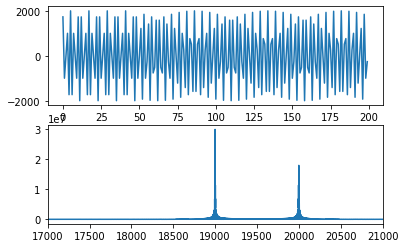

In [47]:
plt.subplot(2,1,1)
plt.plot(audio[23950:24150])
 
plt.subplot(2,1,2)
plt.plot(frequencies)
plt.xlim(17000,21000)

plt.show()

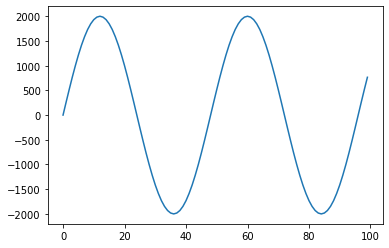

In [12]:
plt.plot(audio[0:100])

In [13]:
#TEST

In [34]:
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 48000
CHUNK = int(1024 * 96)

p = pyaudio.PyAudio()
stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    output=True,
    frames_per_buffer=CHUNK,
)

In [35]:
wf_data = stream.read(CHUNK, exception_on_overflow=False)
wf_data1 = np.array(struct.unpack(str(2 * CHUNK) + 'B', wf_data), dtype='b')[::2]
wf_data2 = np.abs(fft(wf_data1[0:CHUNK]))

In [38]:
wf_data2.shape

(98304,)

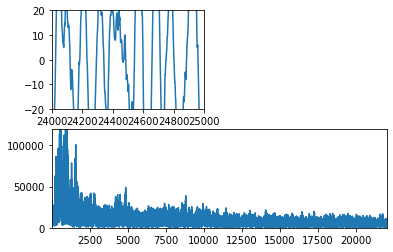

In [37]:
plt.subplot(2,2,1) 
plt.plot(wf_data1)
plt.xlim(24000,25000)
plt.ylim(-20,20)

plt.subplot(2,1,2)
plt.plot(wf_data2)
plt.xlim(1,22000)
plt.ylim(0,120000)
 
plt.show()

In [23]:
FILE2 = "../sound2.wav"
wf = wave.open(FILE2, 'w')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(wf_data)
wf.close()

In [24]:
ipd.Audio(FILE2)